In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 294s 2us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','trcuk']

In [16]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
    plt.show()

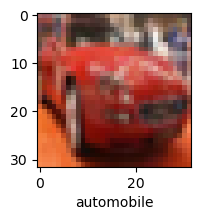

In [18]:
plot_sample(x_train,y_train,5)

In [20]:
cnn = models.Sequential([
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [21]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])


In [22]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.9369 - accuracy: 0.3539
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3749 - accuracy: 0.5090
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1946 - accuracy: 0.5810
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0843 - accuracy: 0.6215
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0117 - accuracy: 0.6498
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9539 - accuracy: 0.6691
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9098 - accuracy: 0.6844
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8719 - accuracy: 0.6966
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8468 - accuracy: 0.7065
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - l

In [23]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1406 - accuracy: 0.6303


[1.1406327486038208, 0.630299985408783]

In [24]:
y_test = y_test.reshape(-1,)

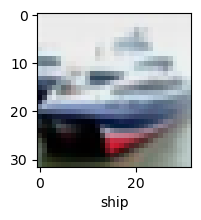

In [25]:
plot_sample(x_test,y_test,1)

In [26]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[1.21642358e-03, 2.58224260e-04, 3.60446353e-03, 7.56809115e-01,
        2.45672534e-03, 2.32029349e-01, 2.00162618e-03, 9.70253081e-04,
        5.89997042e-04, 6.38015845e-05],
       [1.94099978e-01, 5.21895103e-02, 1.41336626e-04, 9.84309008e-05,
        1.23051166e-06, 8.36992149e-06, 1.24483331e-05, 4.10102939e-06,
        7.16985047e-01, 3.64595950e-02],
       [2.96502739e-01, 1.17467836e-01, 1.52868852e-02, 7.36877695e-03,
        2.68166163e-03, 1.86111638e-03, 1.60576252e-03, 5.29063214e-03,
        7.77989104e-02, 4.74135697e-01],
       [7.97313154e-01, 2.02225638e-03, 6.72090380e-03, 1.33391749e-03,
        2.63111695e-04, 2.40292400e-04, 4.19937161e-04, 6.60483420e-05,
        1.88673124e-01, 2.94727623e-03],
       [1.65919191e-03, 4.09731874e-05, 4.84076321e-01, 4.09159288e-02,
        2.68698245e-01, 6.44762665e-02, 1.39491901e-01, 6.04030734e-04,
        7.68960126e-06, 2.93947796e-05]], dtype=float32)

In [27]:
y_classes = [np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 8, 9, 0, 2]

In [31]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)